In [64]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# DATA HANDLING

In [65]:
df = pd.read_excel('tabela6794.xlsx')

In [66]:
max_2016 = df['2016'].sum()
max_2017 = df['2017'].sum()
max_2018 = df['2018'].sum()
max_2019 = df['2019'].sum()
max_2021 = df['2021'].sum()
max_2022 = df['2022'].sum()
max_2023 = df['2023'].sum()

In [67]:
df['2016'] = df['2016'].apply(lambda x: x / max_2016)
df['2017'] = df['2017'].apply(lambda x: x / max_2017)
df['2018'] = df['2018'].apply(lambda x: x / max_2018)
df['2019'] = df['2019'].apply(lambda x: x / max_2019)
df['2021'] = df['2021'].apply(lambda x: x / max_2021)
df['2022'] = df['2022'].apply(lambda x: x / max_2022)
df['2023'] = df['2023'].apply(lambda x: x / max_2023)

In [68]:
df_tidy = df.melt(
    id_vars='Grande Região',
    value_vars=[str(i) for i in itertools.chain(range(2016, 2020), range(2021, 2024))],
    var_name='Ano',
    value_name='Escala'
)

In [69]:
df_tidy['Ano'] = df_tidy['Ano'].astype(int)

In [70]:
df_tidy.to_csv('indice_uso_internet_regioes.csv')

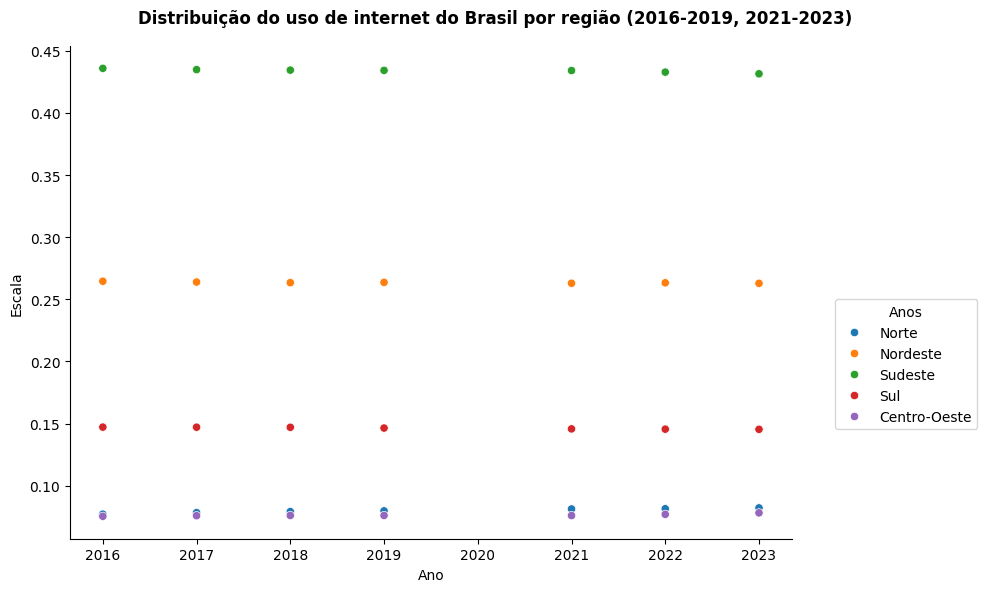

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=df_tidy, x='Ano', y='Escala', hue='Grande Região', palette='tab10')

sns.despine()
plt.suptitle('Distribuição do uso de internet do Brasil por região (2016-2019, 2021-2023)', fontweight='bold')
plt.legend(title='Anos', loc='upper left', bbox_to_anchor=(1.05, 0.5))
plt.tight_layout()
plt.show()
fig.savefig('C:/Users/lazar/Master-Dissertation/figuras/internet/distribuicao_uso_internet_regioes.png')